In [16]:
# -*- coding:utf-8 -*-
import time
import pandas as pd
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
import numpy as np
import influxdb
import folium
import pymongo

In [17]:
#Database 확인 및 선택
client = influxdb.DataFrameClient()

databases = client.query('SHOW DATABASES')
print(databases)

#Measurements 확인
client = influxdb.DataFrameClient()

measurements = client.query('SHOW MEASUREMENTS')
print(measurements)

ResultSet({'('databases', None)': [{'name': '_internal'}, {'name': 'SAMPYO_MONIT'}, {'name': 'Analysis'}, {'name': 'PREP_CS_DATA'}, {'name': 'ELEX_ANALYSIS'}, {'name': 'CS_ANALYSIS'}]})
ResultSet({'('measurements', None)': [{'name': 'COUNT'}, {'name': 'DISTFUEL'}, {'name': 'DTC'}, {'name': 'EACH_E_COST'}, {'name': 'GEOFENCING'}, {'name': 'GPS2'}, {'name': 'MAIN'}, {'name': 'MAIN2'}, {'name': 'OIL_PRICE'}, {'name': 'SENSOR'}, {'name': 'TEST'}, {'name': 'TOTAL_COUNT'}, {'name': 'TOTAL_E_COST'}]})


In [101]:
#BATTERY 값
starttime= time.time()

results = client.query("SELECT RPM/10 AS RPM FROM MAIN2 WHERE car_id='01225797268' AND time > '2019-11-18T06:14:00Z' AND time < '2019-11-18T06:15:00Z'")
df2 = pd.DataFrame(results['MAIN2'])

endtime = time.time() - starttime
print('time: ',endtime)

time:  0.020982742309570312


In [94]:
df2

,COOLANT_TEMPER
2019-11-18 06:14:01+00:00,131.8
2019-11-18 06:14:02+00:00,131.1
2019-11-18 06:14:03+00:00,129.6
2019-11-18 06:14:04+00:00,129.6
2019-11-18 06:14:05+00:00,129.6
2019-11-18 06:14:06+00:00,124.7
2019-11-18 06:14:07+00:00,124.5
2019-11-18 06:14:08+00:00,125.2
2019-11-18 06:14:09+00:00,125.2
2019-11-18 06:14:10+00:00,127.2


C:\Users\WooChoi\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


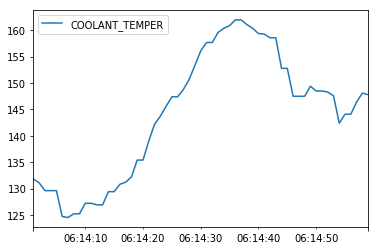

In [95]:
df2.plot()

C:\Users\WooChoi\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


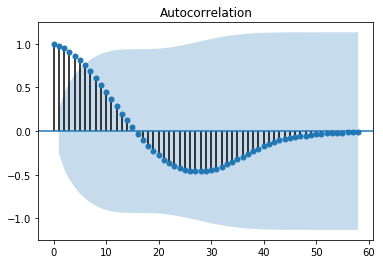

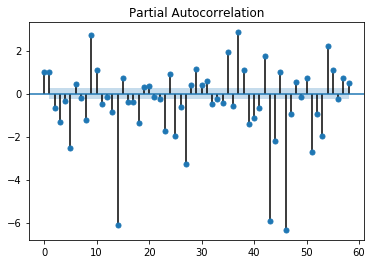

In [102]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df2)
plot_pacf(df2)
plt.show()

C:\Users\WooChoi\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\WooChoi\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


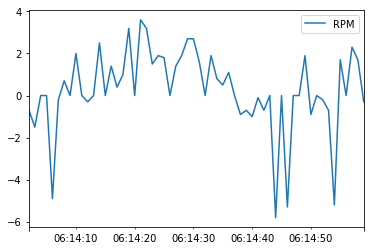

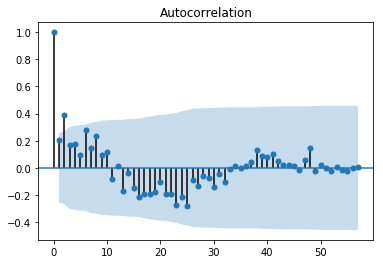

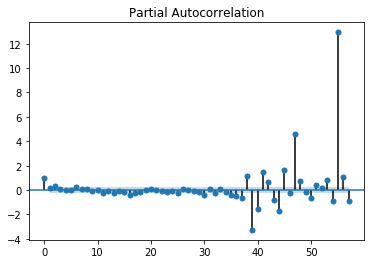

In [103]:
diff_1=df2.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [104]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df2, order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.RPM   No. Observations:                   58
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -119.580
Method:                       css-mle   S.D. of innovations              1.902
Date:                Tue, 19 Nov 2019   AIC                            245.161
Time:                        16:09:54   BIC                            251.342
Sample:                    11-18-2019   HQIC                           247.568
                         - 11-18-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2728      0.279      0.978      0.332      -0.274       0.820
ma.L1.D.RPM     0.1194      0.100      1.198      0.236      -0.076       0.315
                                    Roots       

C:\Users\WooChoi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  % freq, ValueWarning)
C:\Users\WooChoi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\WooChoi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  % freq, ValueWarning)


In [105]:
model = ARIMA(df2, order=(0,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.RPM   No. Observations:                   58
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -120.050
Method:                       css-mle   S.D. of innovations              1.917
Date:                Tue, 19 Nov 2019   AIC                            244.101
Time:                        16:09:55   BIC                            248.222
Sample:                    11-18-2019   HQIC                           245.706
                         - 11-18-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ma.L1.D.RPM     0.1284      0.099      1.296      0.200      -0.066       0.323
                                    Roots                                    
                  Real          Imaginary         

C:\Users\WooChoi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  % freq, ValueWarning)
C:\Users\WooChoi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  % freq, ValueWarning)


C:\Users\WooChoi\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


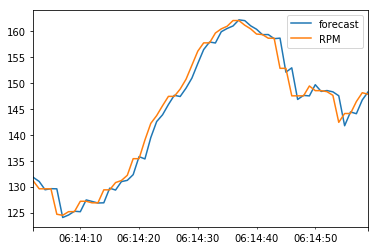

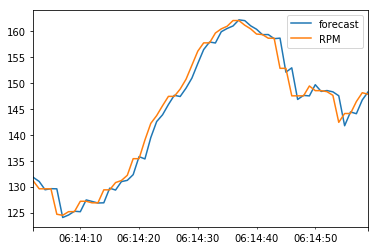

In [106]:
model_fit.plot_predict()